In [1]:
# 0. 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/H2GTRM.TTF' # 윈도우 os font 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font',family=font_name)



In [15]:
# 1. 데이터 로드
df = pd.read_csv('data/gym_churn_us.csv')

# 기본 정보
print(df.shape)
print(df.dtypes.value_counts())
print("결측치:\n", df.isnull().sum()) # 결측치 계산
print("중복 데이터 수:", df.duplicated().sum())  # 중복 데이터 계산


(4000, 14)
int64      10
float64     4
Name: count, dtype: int64
결측치:
 gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64
중복 데이터 수: 0


In [16]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [18]:
# 3. 범주형 변수 분포 및 이탈률
for col in df.columns:
    print(f"==== {col} 분포 ====")
    print(df[col].value_counts(normalize=True) * 100)

    print(f"\n{col} vs Attrition 이탈률 (%):")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100)


==== gender 분포 ====
gender
1    51.025
0    48.975
Name: proportion, dtype: float64

gender vs Attrition 이탈률 (%):
Churn           0          1
gender                      
0       73.506891  26.493109
1       73.444390  26.555610
==== Near_Location 분포 ====
Near_Location
1    84.525
0    15.475
Name: proportion, dtype: float64

Near_Location vs Attrition 이탈률 (%):
Churn                  0          1
Near_Location                      
0              60.258481  39.741519
1              75.894706  24.105294
==== Partner 분포 ====
Partner
0    51.325
1    48.675
Name: proportion, dtype: float64

Partner vs Attrition 이탈률 (%):
Churn            0          1
Partner                      
0        66.682903  33.317097
1        80.636877  19.363123
==== Promo_friends 분포 ====
Promo_friends
0    69.15
1    30.85
Name: proportion, dtype: float64

Promo_friends vs Attrition 이탈률 (%):
Churn                  0          1
Promo_friends                      
0              68.691251  31.308749
1            

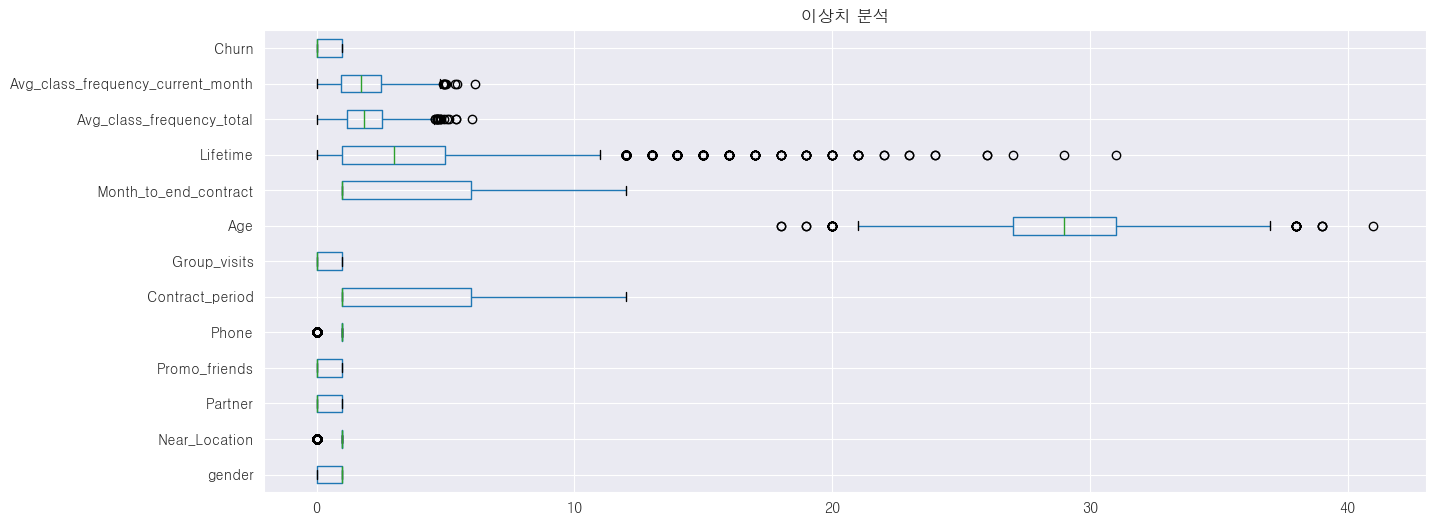

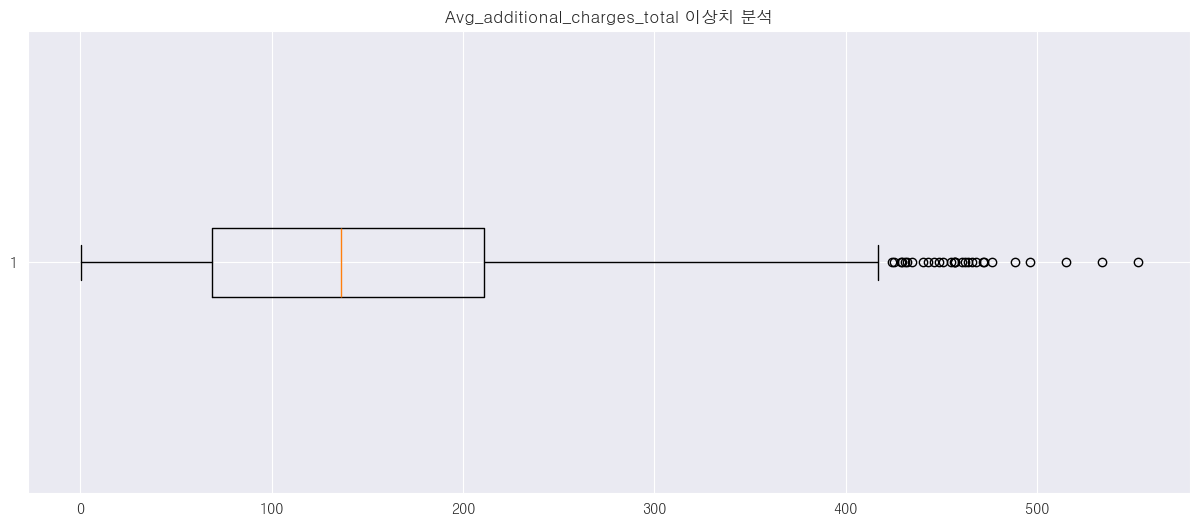

In [20]:
# 1. 특정 컬럼 제외한 데이터 준비
df_charge_total = df['Avg_additional_charges_total']
df_boxplot = df.drop(columns=['Avg_additional_charges_total'])

# 2. Boxplot 시각화 (전체)
plt.figure(figsize=(15, 6))
df_boxplot.boxplot(vert=False)
plt.title('이상치 분석')
plt.show()

# 3. Boxplot 시각화 (Avg_additional_charges_total만)
plt.figure(figsize=(15, 6))
plt.boxplot(df_charge_total, vert=False)
plt.title('Avg_additional_charges_total 이상치 분석')
plt.show()



In [12]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col} 이상치 개수: {outliers.count()}")


gender 이상치 개수: 0
Near_Location 이상치 개수: 619
Partner 이상치 개수: 0
Promo_friends 이상치 개수: 0
Phone 이상치 개수: 386
Contract_period 이상치 개수: 0
Group_visits 이상치 개수: 0
Age 이상치 개수: 32
Avg_additional_charges_total 이상치 개수: 29
Month_to_end_contract 이상치 개수: 0
Lifetime 이상치 개수: 192
Avg_class_frequency_total 이상치 개수: 16
Avg_class_frequency_current_month 이상치 개수: 8
Churn 이상치 개수: 0


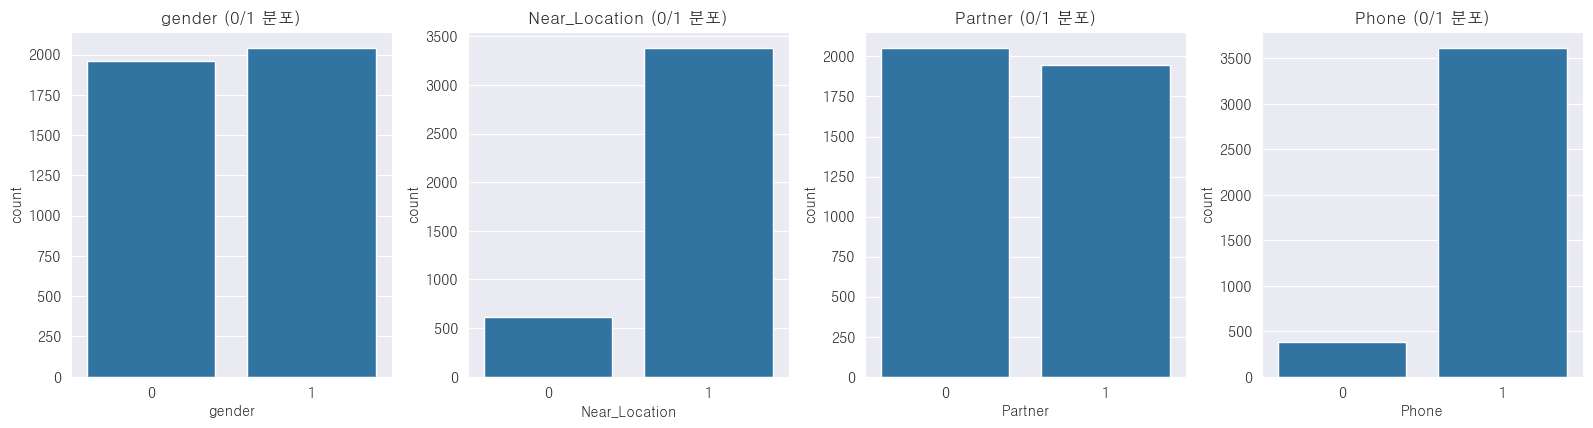

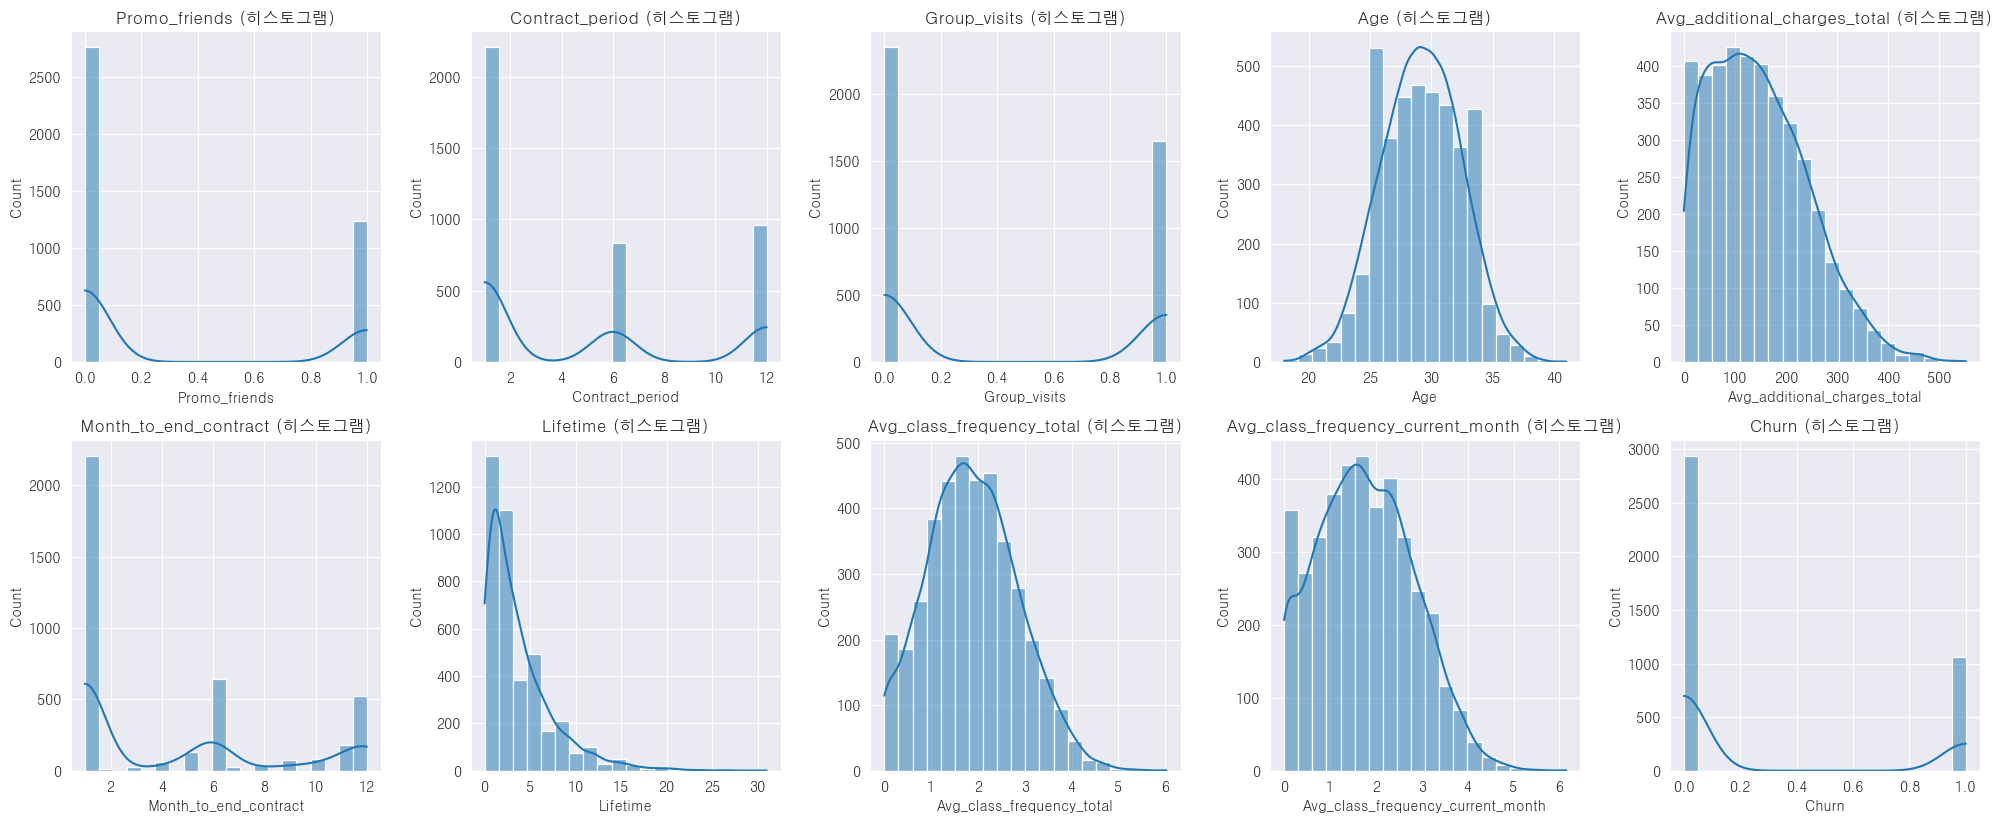

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 0/1 컬럼
binary_cols = [col for col in df.columns if col.lower() in ['phone', 'partner', 'near_location', 'gender', 'Promo_friends', 'Contract_period', 'Group_visits']]

# 2. 나머지 수치형 컬럼
num_cols = [col for col in df.columns if col not in binary_cols]

# 3. 0/1 변수 - 서브플롯
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} (0/1 분포)")

# 나머지 빈 공간 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 4. 나머지 수치형 변수 - 서브플롯
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"{col} (히스토그램)")

# 나머지 빈 공간 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYGothic-Medium.
  fig.canvas.draw()
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) HYGothic-Medium.
  fig.canvas.print_figure(bytes_io, **kw)


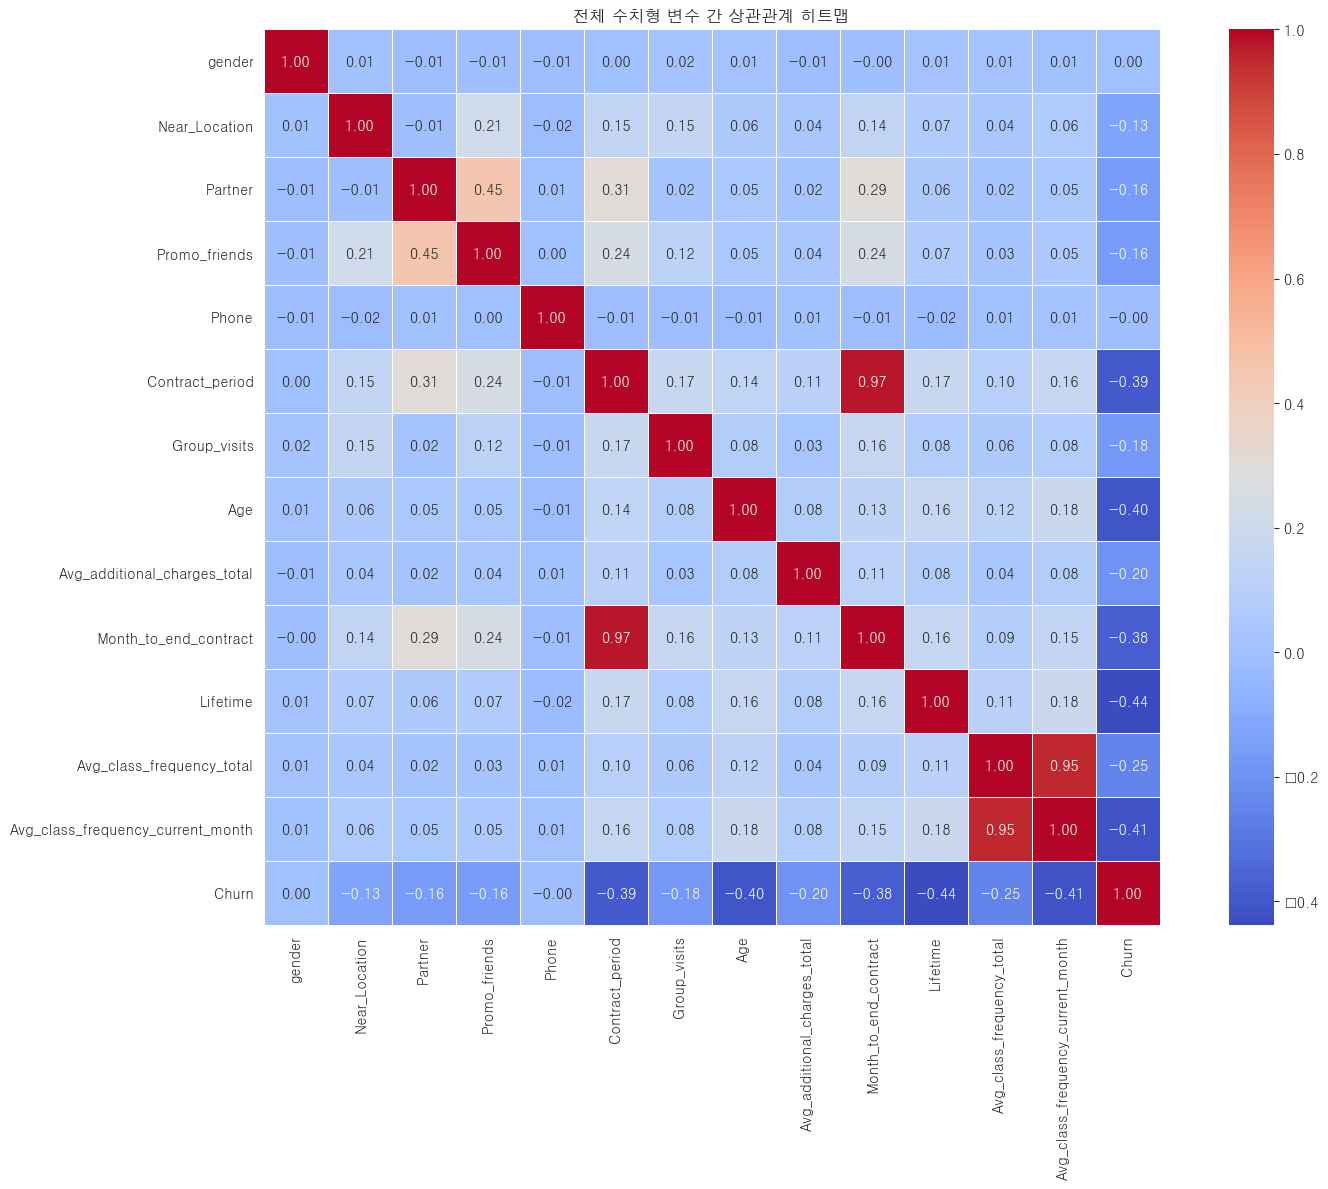

In [7]:
# 수치형 변수 상관관계 계산
corr_matrix = df.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(16, 12))  # 크기 조정
sns.heatmap(corr_matrix,
            annot=True,        # 값 표시
            fmt='.2f',         # 소수점 둘째 자리
            cmap='coolwarm',   # 색상
            linewidths=0.5,    # 셀 경계선
            square=True)
plt.title('전체 수치형 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()

C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}

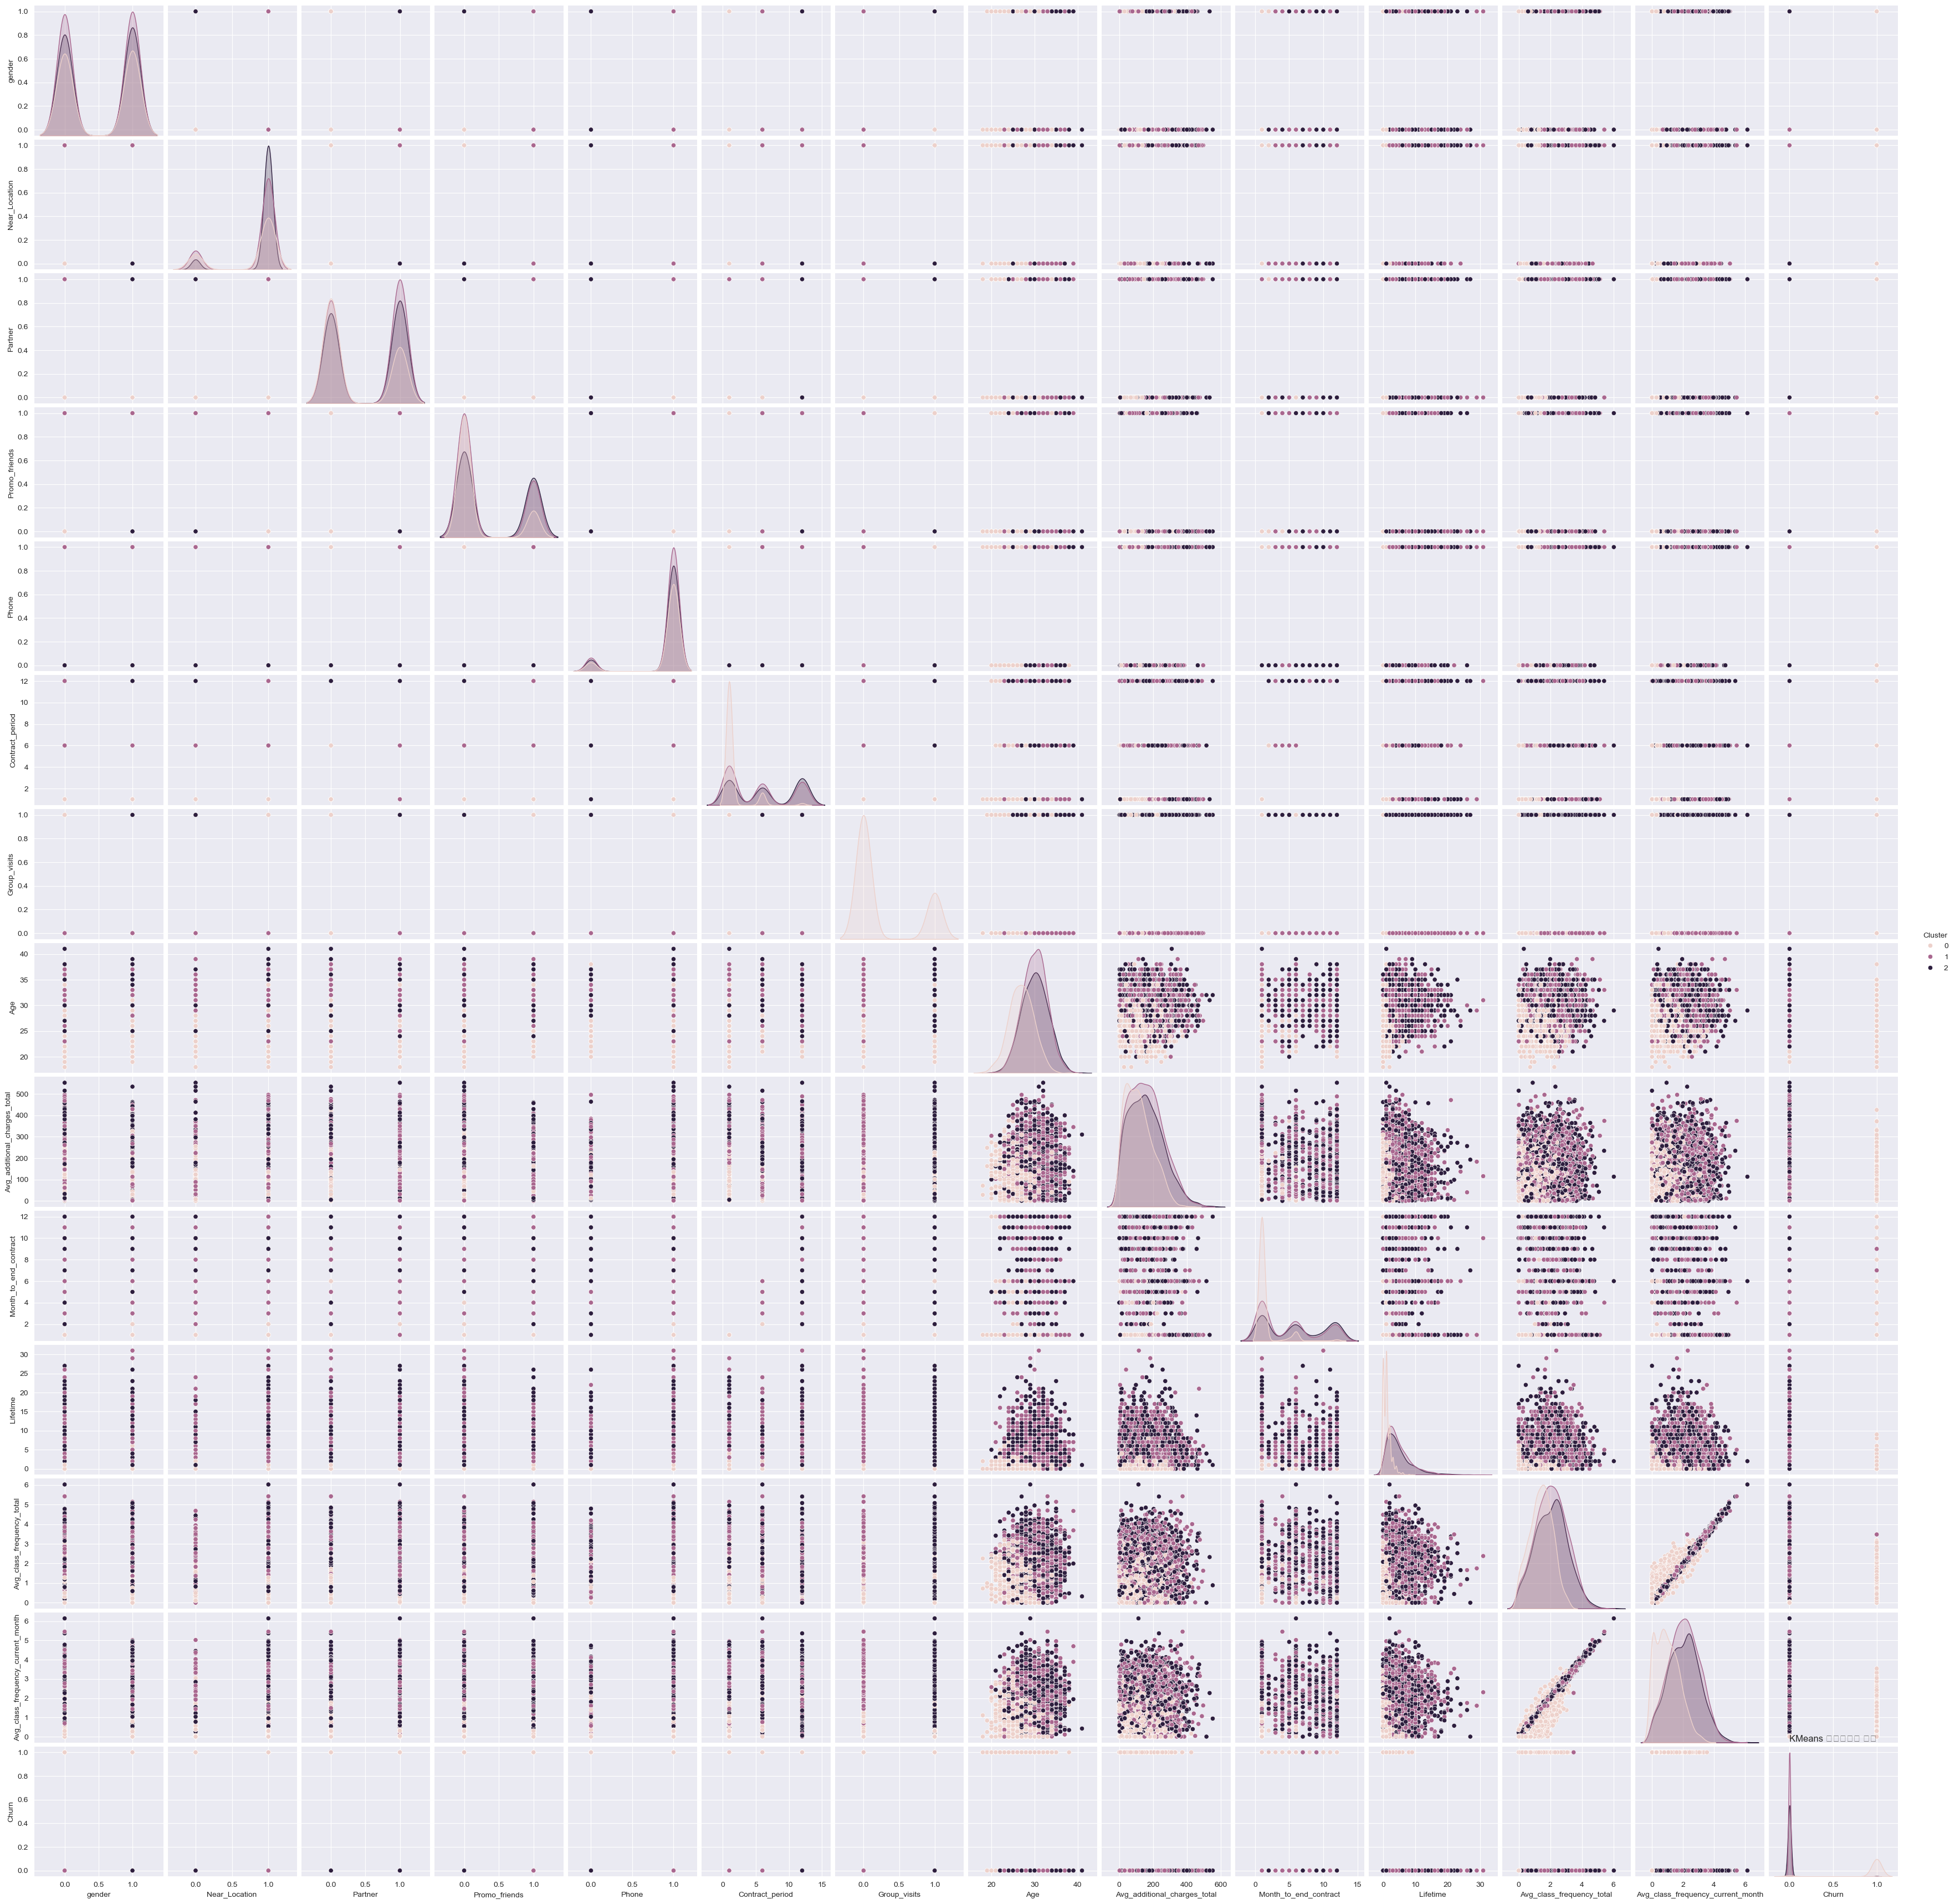

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df[num_cols])  # 수치형 변수만 사용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

sns.pairplot(df, hue='Cluster')
plt.title("KMeans 클러스터링 결과")
plt.show()


C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU})

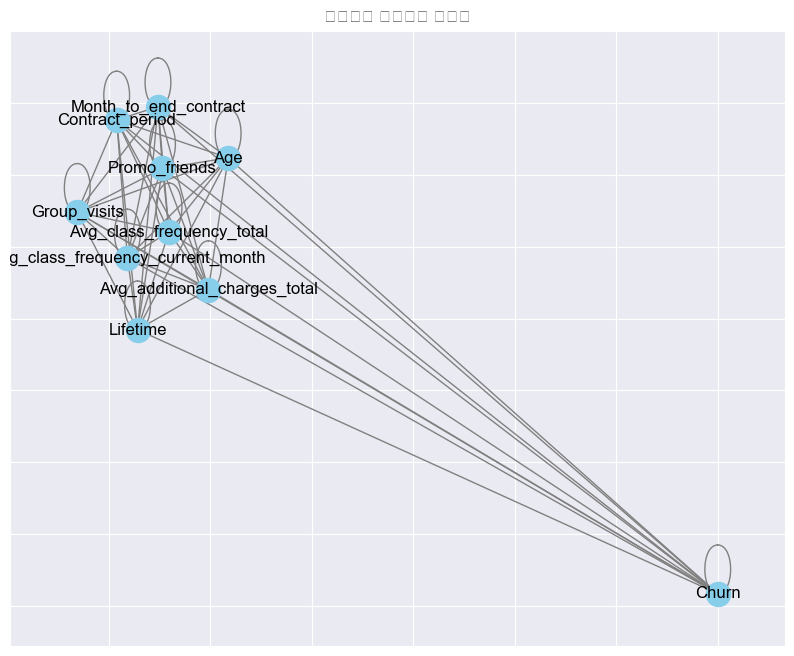

In [25]:
import networkx as nx

corr = df[num_cols].corr()
G = nx.from_pandas_adjacency(corr)
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("상관관계 네트워크 그래프")
plt.show()


## 7. 주요 분석 인사이트

- **이진 변수 분포 불균형**
  - 일부 컬럼에서 0/1 분포가 치우쳐 있음
  - 예: `Partner`, `Promo_friends` 등이 특정 값에 편향
  - 머신러닝 모델 편향 가능성 존재

- **`Avg_additional_charges_total` 변수의 극단적 이상치**
  - 일부 고객에서 매우 높은 값이 발견됨
  - IQR 방식으로 이상치 다수 탐지됨
  - 로그 변환, 이상치 대체, 해석적 분석 등 필요

- **수치형 변수 간 상관관계 전반적으로 낮음**
  - 대부분 변수들이 서로 독립적
  - 다중공선성 문제 적음
  - 비선형 모델(RandomForest, XGBoost) 적용 고려 가능

- **클러스터링 분석에서 특정 그룹 특성 발견 가능성**
  - KMeans로 3개 군집 시각적으로 구분됨
  - 군집별 평균 값 분석 필요
  - 고객 세분화 및 타겟 마케팅 전략에 활용 가능
